In [1]:
# This line configures matplotlib to show figures embedded in the notebook, 
# instead of opening a new window for each figure.
%matplotlib inline

## Introduction 

Matplotlib is an excellent 2D and 3D graphics library for generating scientific figures. Some of the many advantages of this library include:
- Easy to get started
- Great control of every element in a figure, including figure size and DPI
- High-quality output in many formats, including PNG, PDF, SVG, EPS and PGF
- GUI for interactively exploring figures and support for headless generation of figure files (useful for batch jobs)

In [2]:
import matplotlib
import matplotlib.pyplot as plt

import numpy as np

## MATLAB-like API

The easiest way to get started with plotting using matplotlib is often to use the MATLAB-like API provided by matplotlib.

It is designed to be compatible with MATLAB's plotting functions, so it is easy to get started with if you are familiar with MATLAB.

To use this API from matplotlib, we need to include the symbols in the `pylab`
module:

In [3]:
from pylab import *

### Example

In [4]:
x = np.linspace(0, 5, 10)
y = x ** 2

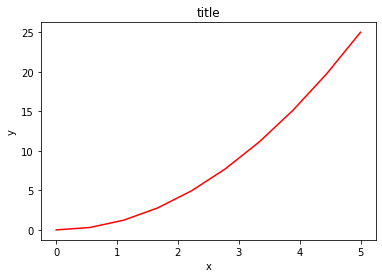

In [5]:
figure()
plot(x,y,'r')
xlabel('x')
ylabel('y')
title('title')
show()

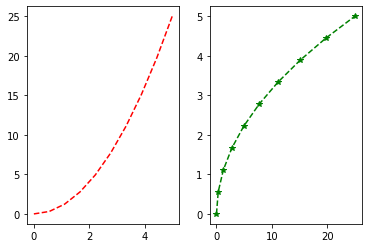

In [6]:
subplot(1,2,1)
plot(x,y, 'r--')
subplot(1,2,2)
plot(y,x, 'g*--');

The good thing about the pylab MATLAB-style API is that it is easy to get started with if you are familiar with MATLAB, and it has a minumum of coding overhead for simple plots.

However, I'd encourrage not using the MATLAB compatible API for anything but the simplest figures.

Instead, I recommend learning and using matplotlib's object-oriented plotting API. It is remarkably powerful. For advanced figures with subplots, insets and other components it is very nice to work with.


## The matplotlib object-oriented API

The main idea with object-oriented programming is to have objects that one can apply functions and actions on, and no object or program states should be global (such as the MATLAB-like API). The real advantage of this approach becomes apparent when more than one figure is created, or when a figure contains more than one subplot.

To use the object-oriented API we start out very much like in the previous example, but instead of creating a new global figure instance we store a reference to the newly created figure instance in the `fig` variable, and from it we create a new axis instance `axes` using the `add_axes` method in the `Figure` class instance `fig`:


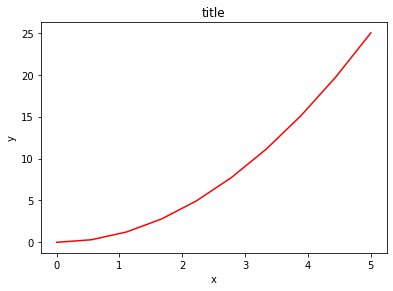

In [7]:
fig = plt.figure()

axes = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # left, bottom, width, height (range 0 to 1)

axes.plot(x, y, 'r')

axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title');

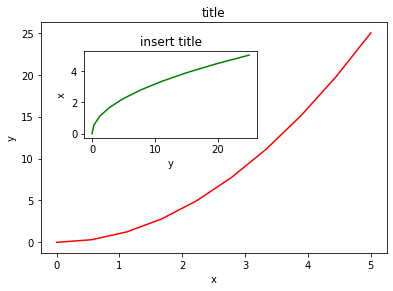

In [8]:
fig = plt.figure()

axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
axes2 = fig.add_axes([0.2, 0.5, 0.4, 0.3]) # insert axes

# main figure
axes1.plot(x,y,'r')
axes1.set_xlabel('x')
axes1.set_ylabel('y')
axes1.set_title('title')

# insert
axes2.plot(y, x, 'g')
axes2.set_xlabel('y')
axes2.set_ylabel('x')
axes2.set_title('insert title');

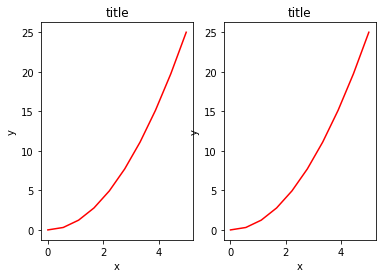

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=2)

for ax in axes:
    ax.plot(x, y, 'r')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('title')

We can deal with that by using the `fig.tight_layout` method, which automatically adjusts the positions of the axes on the figure canvas so that there is no overlapping content:

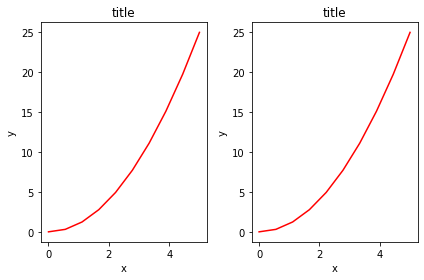

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=2)

for ax in axes:
    ax.plot(x, y, 'r')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('title')
    
fig.tight_layout()

### Figure size, aspect ratio and DPI

Matplotlib allows the aspect ratio, DPI and figure size to be specified when the `Figure` object is created, using the `figsize` and `dpi` keyword arguments. `figsize` is a tuple of the width and height of the figure in inches, and `dpi` is the dots-per-inch (pixel per inch). To create an 800x400 pixel, 100 dots-per-inch figure, we can do:

In [44]:
fig = plt.figure(figsize=(8,4), dpi=100);

<Figure size 800x400 with 0 Axes>

The same arguments can also be passed to layout managers, such as the `subplots` function:

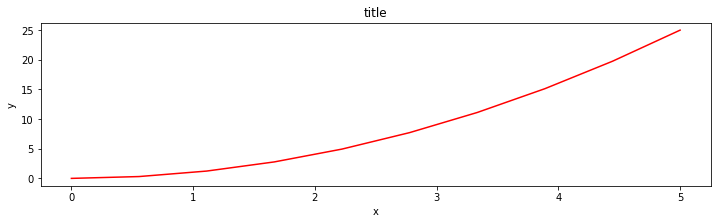

In [12]:
fig, axes = plt.subplots(figsize=(12,3))

axes.plot(x, y, 'r')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title');

The following figure shows how to use the figure title, axis labels and legends described above:

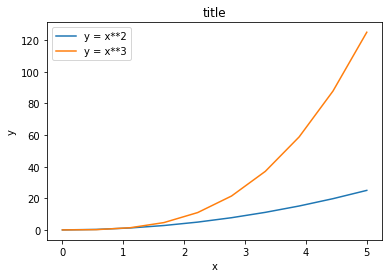

In [13]:
fig, ax = plt.subplots()

ax.plot(x, x**2, label="y = x**2")
ax.plot(x, x**3, label="y = x**3")
ax.legend(loc=2); # loc=0: let Matplotlib decides
                  # loc=1: upper right corner
                  # loc=2: upper left corner
                  # loc=3: lower left corner
                  # loc=4: lower right corner
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('title');

### Formatting text: LaTeX, fontsize, font family

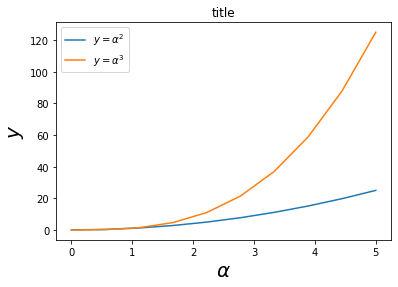

In [14]:
fig, ax = plt.subplots()

ax.plot(x, x**2, label=r"$y = \alpha^2$")
ax.plot(x, x**3, label=r"$y = \alpha^3$")
ax.legend(loc=2) # upper left corner
ax.set_xlabel(r'$\alpha$', fontsize=20)
ax.set_ylabel(r'$y$', fontsize=20)
ax.set_title('title');

We can also change the global font size and font family, which applies to all text elements in a figure (tick labels, axis labels and titles, legends, etc.):

In [15]:
# Update the matplotlib configuration parameters:
matplotlib.rcParams.update({'font.size': 18, 'font.family': 'serif'})

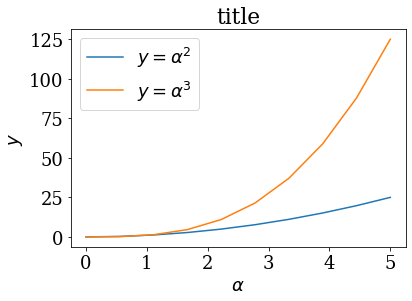

In [16]:
fig, ax = plt.subplots()

ax.plot(x, x**2, label=r"$y = \alpha^2$")
ax.plot(x, x**3, label=r"$y = \alpha^3$")
ax.legend(loc=2) # upper left corner
ax.set_xlabel(r'$\alpha$')
ax.set_ylabel(r'$y$')
ax.set_title('title');

In [17]:
# Update the matplotlib configuration parameters:
matplotlib.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

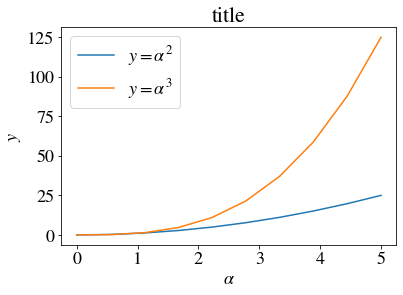

In [18]:
fig, ax = plt.subplots()

ax.plot(x, x**2, label=r"$y = \alpha^2$")
ax.plot(x, x**3, label=r"$y = \alpha^3$")
ax.legend(loc=2) # upper left corner
ax.set_xlabel(r'$\alpha$')
ax.set_ylabel(r'$y$')
ax.set_title('title');

### Setting colors, linewidths, linetypes

#### Colors
We can also define colors by their names or RGB hex codes and optionally provide an alpha value using the `color` and `alpha` keyword arguments:

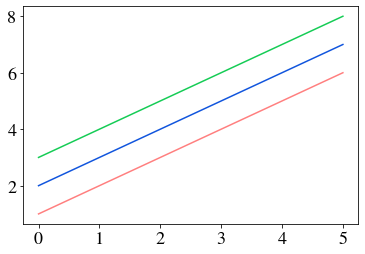

In [19]:
fig, ax = plt.subplots()

ax.plot(x, x+1, color="red", alpha=0.5) # half-transparant red
ax.plot(x, x+2, color="#1155dd")        # RGB hex code for a bluish color
ax.plot(x, x+3, color="#15cc55");        # RGB hex code for a greenish color

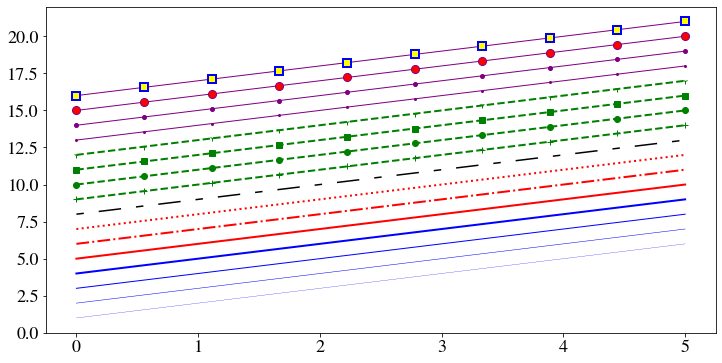

In [20]:
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(x, x+1, color="blue", linewidth=0.25)
ax.plot(x, x+2, color="blue", linewidth=0.50)
ax.plot(x, x+3, color="blue", linewidth=1.00)
ax.plot(x, x+4, color="blue", linewidth=2.00)

# possible linestype options ‘-‘, ‘--’, ‘-.’, ‘:’, ‘steps’
ax.plot(x, x+5, color="red", lw=2, linestyle='-')
ax.plot(x, x+6, color="red", lw=2, ls='-.')
ax.plot(x, x+7, color="red", lw=2, ls=':')

# custom dash
line, = ax.plot(x, x+8, color="black", lw=1.50)
line.set_dashes([5, 10, 15, 10]) # format: line length, space length, ...

# possible marker symbols: marker = '+', 'o', '*', 's', ',', '.', '1', '2', '3', '4', ...
ax.plot(x, x+9, color="green", lw=2, ls='--', marker='+')
ax.plot(x, x+10, color="green", lw=2, ls='--', marker='o')
ax.plot(x, x+11, color="green", lw=2, ls='--', marker='s')
ax.plot(x, x+12, color="green", lw=2, ls='--', marker='1')

# marker size and color
ax.plot(x, x+13, color="purple", lw=1, ls='-', marker='o', markersize=2)
ax.plot(x, x+14, color="purple", lw=1, ls='-', marker='o', markersize=4)
ax.plot(x, x+15, color="purple", lw=1, ls='-', marker='o', markersize=8, markerfacecolor="red")
ax.plot(x, x+16, color="purple", lw=1, ls='-', marker='s', markersize=8, 
        markerfacecolor="yellow", markeredgewidth=2, markeredgecolor="blue");

### Control over axis appearance
The appearance of the axes is an important aspect of a figure that we need to modify to make a publication quality graphics. We need to be able to control where the ticks and labels are placed, modify the font size and possibly the labels used on the axes.

#### Plot range
The first thing we might want to configure is the ranges of the axes. We can do this using the `set_ylim` and `set_xlim` methods in the axis object, or `axis('tight')`.

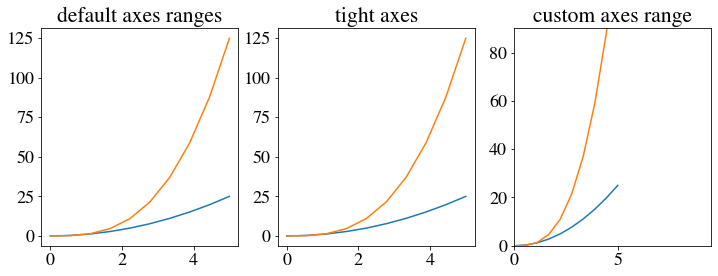

In [21]:
fig, axes = plt.subplots(1, 3, figsize=(12,4))

axes[0].plot(x, x**2, x, x**3)
axes[0].set_title("default axes ranges")

axes[1].plot(x, x**2, x, x**3)
axes[1].axis('tight')
axes[1].set_title("tight axes")

axes[2].plot(x, x**2, x, x**3)
axes[2].set_ylim([0, 90])
axes[2].set_xlim([0, 9.5])
axes[2].set_title("custom axes range");

#### Logarithmic scale
It is also possible to set a logarithmic scale for one or both axes.

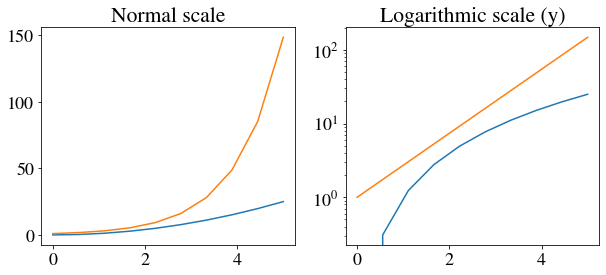

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(10,4))

axes[0].plot(x, x**2, x, np.exp(x))
axes[0].set_title("Normal scale")

axes[1].plot(x, x**2, x, np.exp(x))
axes[1].set_yscale("log")
axes[1].set_title("Logarithmic scale (y)");

### Placement of ticks and custom tick labels
We can determine where we want the axis ticks with `set_xticks` and `set_yticks`, and also use the `set_xticklabels` and `set_yticklabels`.

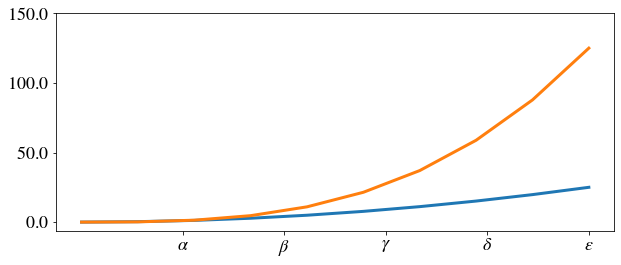

In [23]:
fig, ax = plt.subplots(figsize=(10,4))

ax.plot(x, x**2, x, x**3, lw=3)

ax.set_xticks([1, 2, 3, 4, 5])
ax.set_xticklabels([r'$\alpha$', r'$\beta$', r'$\gamma$', r'$\delta$', r'$\epsilon$'], fontsize=18)

yticks = [0, 50, 100, 150]
ax.set_yticks(yticks)
ax.set_yticklabels(["$%.1f$" % y for y in yticks], fontsize=18);

#### Scientific notation
With large numbers on axes, it is often better to use scientific notation.

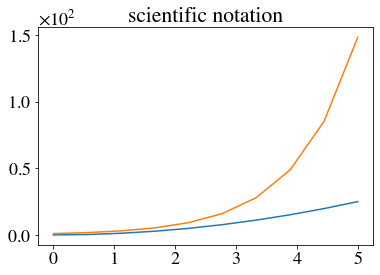

In [45]:
fig, ax = plt.subplots(1, 1)
      
ax.plot(x, x**2, x, np.exp(x))
ax.set_title("scientific notation")

ax.set_yticks([0, 50, 100, 150])

from matplotlib import ticker
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
formatter.set_powerlimits((-1,1)) 
ax.yaxis.set_major_formatter(formatter);

#### Axis grid
With the grid method in the axis object, we can turn on and off grid lines.

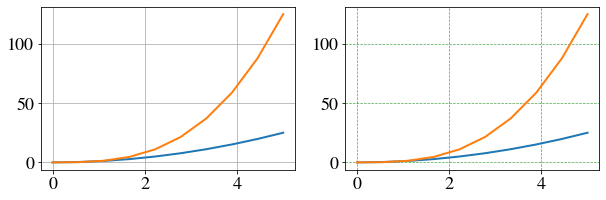

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(10,3))

# default grid appearance
axes[0].plot(x, x**2, x, x**3, lw=2)
axes[0].grid(True)

# custom grid appearance
axes[1].plot(x, x**2, x, x**3, lw=2)
axes[1].grid(color='g', alpha=0.7, linestyle='dashed', linewidth=0.7)

### Other 2D plot styles

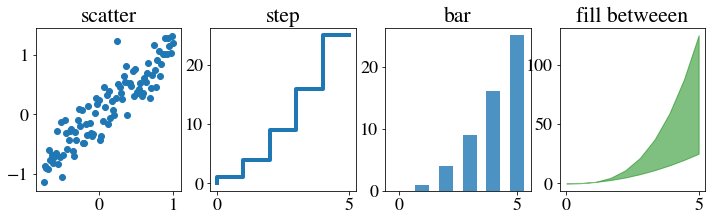

In [26]:
n = np.array([0,1,2,3,4,5])
xx = np.linspace(-0.75, 1., 100)

fig, ax = plt.subplots(1, 4, figsize=(12,3))

ax[0].scatter(xx, xx+0.25*np.random.randn(len(xx)))
ax[0].set_title("scatter")

ax[1].step(n, n**2, lw=4)
ax[1].set_title("step")

ax[2].bar(n, n**2, align="center", width=0.6, alpha=0.8)
ax[2].set_title("bar")

ax[3].fill_between(x, x**2, x**3, color="green", alpha=0.5)
ax[3].set_title("fill betweeen");

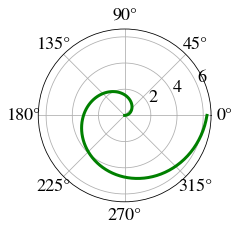

In [27]:
# polar plot using add_axes and polar projection
fig = plt.figure()
ax = fig.add_axes([0.0, 0.0, .6, .6], polar=True)
t = np.linspace(0, 2 * np.pi, 100)
ax.plot(t, t, color='green', lw=3);

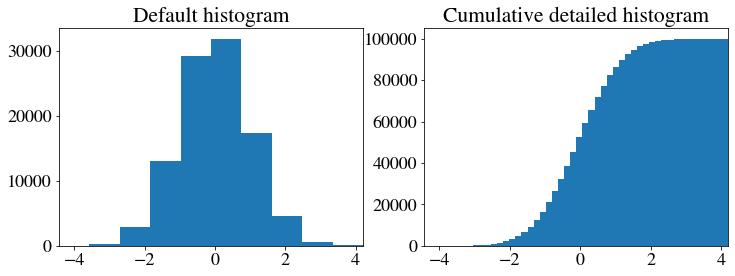

In [28]:
# A histogram
n = np.random.randn(100000)
fig, axes = plt.subplots(1, 2, figsize=(12,4))

axes[0].hist(n)
axes[0].set_title("Default histogram")
axes[0].set_xlim((min(n), max(n)))

axes[1].hist(n, cumulative=True, bins=50)
axes[1].set_title("Cumulative detailed histogram")
axes[1].set_xlim((min(n), max(n)));

### Text annotation
Annotating text in matplotlib figures can be done using the `text` function.

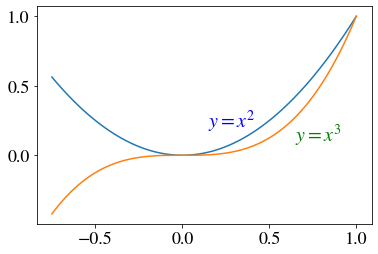

In [47]:
fig, ax = plt.subplots()

ax.plot(xx, xx**2, xx, xx**3)

ax.text(0.15, 0.2, r"$y=x^2$", fontsize=20, color="blue")
ax.text(0.65, 0.1, r"$y=x^3$", fontsize=20, color="green");

#### subplots

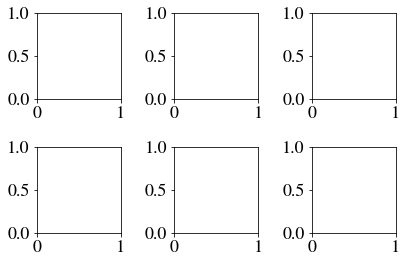

In [30]:
fig, ax = plt.subplots(2, 3)
fig.tight_layout()

#### subplot2grid

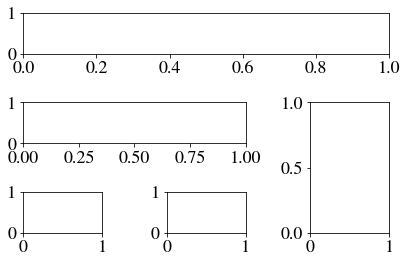

In [31]:
fig = plt.figure()
ax1 = plt.subplot2grid((3,3), (0,0), colspan=3)
ax2 = plt.subplot2grid((3,3), (1,0), colspan=2)
ax3 = plt.subplot2grid((3,3), (1,2), rowspan=2)
ax4 = plt.subplot2grid((3,3), (2,0))
ax5 = plt.subplot2grid((3,3), (2,1))
fig.tight_layout()

#### gridspec

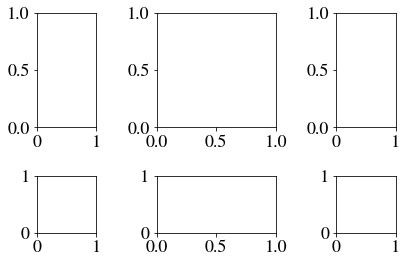

In [32]:
import matplotlib.gridspec as gridspec

fig = plt.figure()

gs = gridspec.GridSpec(2, 3, height_ratios=[2,1], width_ratios=[1,2,1])
for g in gs:
    ax = fig.add_subplot(g)
    
fig.tight_layout()

#### add_axes

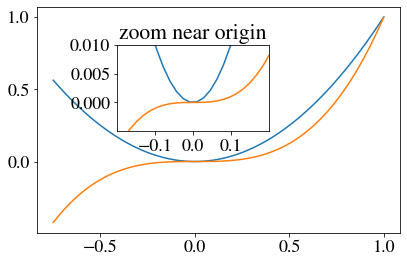

In [33]:
fig, ax = plt.subplots()

ax.plot(xx, xx**2, xx, xx**3)
fig.tight_layout()

# inset
inset_ax = fig.add_axes([0.3, 0.5, 0.35, 0.30]) # X, Y, width, height

inset_ax.plot(xx, xx**2, xx, xx**3)
inset_ax.set_title('zoom near origin')

# set axis range
inset_ax.set_xlim(-.2, .2)
inset_ax.set_ylim(-.005, .01)

# set axis tick locations
inset_ax.set_yticks([0, 0.005, 0.01])
inset_ax.set_xticks([-0.1,0,.1]);

### Colormap and contour figures
Colormaps and contour figures are useful for plotting funtions of two variables.

In [34]:
alpha = 0.7
phi_ext = 2 * np.pi * 0.5

def flux_qubit_potential(phi_m, phi_p):
    return 2 + alpha - 2 * np.cos(phi_p) * np.cos(phi_m) - alpha * np.cos(phi_ext - 2*phi_p)

In [35]:
phi_m = np.linspace(0, 2*np.pi, 100)
phi_p = np.linspace(0, 2*np.pi, 100)
X,Y = np.meshgrid(phi_p, phi_m)
Z = flux_qubit_potential(X, Y).T

#### pcolor

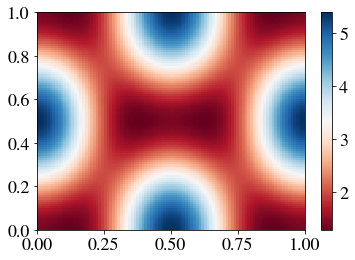

In [36]:
fig, ax = plt.subplots()

p = ax.pcolor(X/(2*np.pi), Y/(2*np.pi), Z, cmap=matplotlib.cm.RdBu, vmin=abs(Z).min(), vmax=abs(Z).max())
cb = fig.colorbar(p, ax=ax)

#### imshow

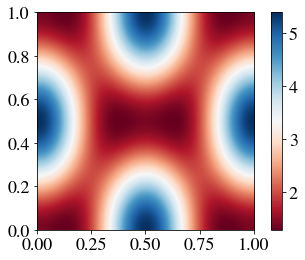

In [37]:
fig, ax = plt.subplots()

im = ax.imshow(Z, cmap=matplotlib.cm.RdBu, vmin=abs(Z).min(), vmax=abs(Z).max(), extent=[0, 1, 0, 1])
im.set_interpolation('bilinear')

cb = fig.colorbar(im, ax=ax)

#### contour

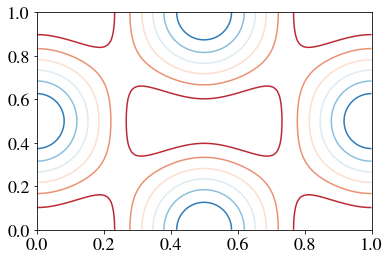

In [38]:
fig, ax = plt.subplots()

cnt = ax.contour(Z, cmap=matplotlib.cm.RdBu, vmin=abs(Z).min(), vmax=abs(Z).max(), extent=[0, 1, 0, 1])

## 3D figures
To use 3D graphics in matplotlib, we first need to create an instance of the `Axes3D` class. 3D axes can be added to a matplotlib figure canvas in exactly the same way as 2D axes; or, more conveniently, by passing a `projection='3d'` keyword argument to the `add_axes` or `add_subplot` methods.

In [39]:
from mpl_toolkits.mplot3d.axes3d import Axes3D

#### Surface plots

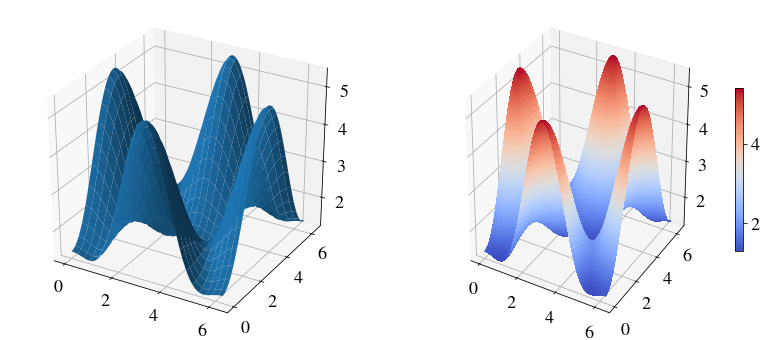

In [40]:
fig = plt.figure(figsize=(14,6))

# `ax` is a 3D-aware axis instance because of the projection='3d' keyword argument to add_subplot
ax = fig.add_subplot(1, 2, 1, projection='3d')

p = ax.plot_surface(X, Y, Z, rstride=4, cstride=4, linewidth=0)

# surface_plot with color grading and color bar
ax = fig.add_subplot(1, 2, 2, projection='3d')
p = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=matplotlib.cm.coolwarm, linewidth=0, antialiased=False)
cb = fig.colorbar(p, shrink=0.5)

#### Wire-frame plot

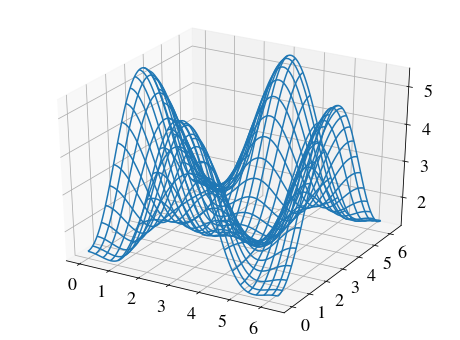

In [41]:
fig = plt.figure(figsize=(8,6))

ax = fig.add_subplot(1, 1, 1, projection='3d')

p = ax.plot_wireframe(X, Y, Z, rstride=4, cstride=4)

#### Contour plots with projections

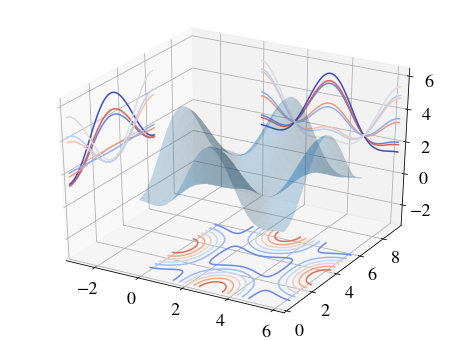

In [42]:
fig = plt.figure(figsize=(8,6))

ax = fig.add_subplot(1,1,1, projection='3d')

ax.plot_surface(X, Y, Z, rstride=4, cstride=4, alpha=0.25)
cset = ax.contour(X, Y, Z, zdir='z', offset=-np.pi, cmap=matplotlib.cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='x', offset=-np.pi, cmap=matplotlib.cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='y', offset=3*np.pi, cmap=matplotlib.cm.coolwarm)

ax.set_xlim3d(-np.pi, 2*np.pi);
ax.set_ylim3d(0, 3*np.pi);
ax.set_zlim3d(-np.pi, 2*np.pi);

#### Change the view angle
We can change the perspective of a 3D plot using the `view_init` method.

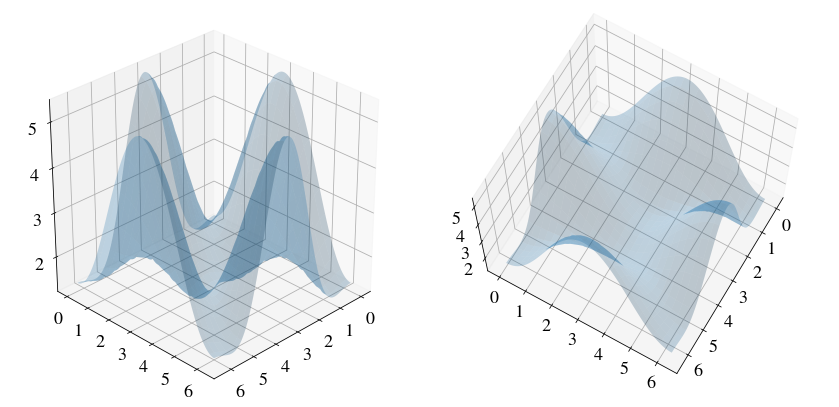

In [43]:
fig = plt.figure(figsize=(12,6))

ax = fig.add_subplot(1,2,1, projection='3d')
ax.plot_surface(X, Y, Z, rstride=4, cstride=4, alpha=0.25)
ax.view_init(30, 45)

ax = fig.add_subplot(1,2,2, projection='3d')
ax.plot_surface(X, Y, Z, rstride=4, cstride=4, alpha=0.25)
ax.view_init(70, 30)

fig.tight_layout()